In [1]:
# IMPORTAÇÕES

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.integrate import odeint

In [2]:
# Importação dos dados no formato .csv obtidos por meio do Allen Institute

df = pd.read_csv('cell_types_specimen_details.csv',delimiter =',')

In [3]:
# Opção para visualizar todas as linhas e colunas do df

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
df.head()

,line_name,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,nr__max_euclidean_distance,nr__number_stems,nr__number_bifurcations,nr__average_contraction,nr__average_parent_daughter_ratio,nr__reconstruction_type,nrwkf__id,erwkf__id,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__adaptation,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__avg_isi,ef__avg_firing_rate,ef__ri,ef__peak_t_ramp,ef__vrest,si__height,si__width,si__path,csl__x,csl__y,csl__z,csl__normalized_depth,cell_reporter_status,m__glif,m__biophys,m__biophys_perisomatic,m__biophys_all_active,tag__apical,tag__dendrite_type,morph_thumb_path,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,NaN,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,618211597,-53.875004,2.895461,0.027846,0.167187,90.0,21.181026,73.678333,13.572511,159.531131,4.104107,-70.561035,NaN,NaN,NaN,273.000000,354.000000,216.000000,NaN,NaN,5,0,0,0,intact,spiny,NaN,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
1,Oxtr-T2A-Cre,565871768,Oxtr-2A-Cre;Ai14-293837.03.01.02,left,778,"""Primary visual area, layer 5""",VISp5,385,VISp,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659446233,-59.187500,1.564027,NaN,0.020384,270.0,11.291090,NaN,NaN,119.977675,14.737200,-74.926987,NaN,NaN,NaN,8966.563310,1429.526891,8567.389673,0.582057,positive,2,0,0,0,NaN,aspiny,NaN,/api/v2/well_known_file_download/566738214,/api/v2/well_known_file_download/566738219,NaN,NaN,NaN,NaN,NaN,Mus musculus,563340157,Oxtr-T2A-Cre;Ai14-293837
2,Pvalb-IRES-Cre,469801138,Pvalb-IRES-Cre;Ai14-170927.05.02.01,right,721,"""Primary visual area, layer 4""",VISp4,385,VISp,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,491200026,-55.687504,1.162618,0.000643,1.156789,290.0,4.121689,12.507500,79.952029,65.624997,11.763022,-72.042976,NaN,NaN,NaN,7872.531385,993.212032,3127.153047,0.469578,positive,0,0,0,0,NaN,aspiny,NaN,/api/v2/well_known_file_download/487618917,/api/v2/well_known_file_download/491380580,NaN,NaN,NaN,NaN,NaN,Mus musculus,319194354,Pvalb-IRES-Cre;Ai14(IVSCC)-170927
3,NaN,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,681955656,-67.125000,1.891881,0.001610,0.735093,90.0,12.614641,12.912368,77.445126,201.562688,NaN,-69.209610,NaN,NaN,NaN,69.000000,254.000000,96.000000,NaN,NaN,0,0,0,0,NaN,aspiny,NaN,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
4,Slc32a1-T2A-FlpO|Vipr2-IRES2-Cre,605889373,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419.0...,right,821,"""Primary visual area, layer 2/3""",VISp2/3,385,VISp,2/3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,657618169,-47.093754,3.379321,-0.015098,0.191853,280.0,5.166574,78.950909,12.666099,102.968708,8.423400,-72.712036,NaN,NaN,NaN,9400.000000,1520.742327,2188.138452,NaN,positive,2,0,0,0,NaN,aspiny,NaN,/api/v2/well_known_file_download/657612184,/api/v2/well_known_file_download/657612186,NaN,NaN,NaN,NaN,NaN,Mus musculus,605622695,Vipr2-IRES2-Cre;Slc32a1-T2A-FlpO;Ai65-337419


In [5]:
# Busca de valor no DataFrame

valor_procurado = "epilepsy"
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        if df.iloc[i, j] == valor_procurado:
            print(f"Valor {valor_procurado} encontrado na linha {i} e coluna {df.columns[j]}")

Valor epilepsy encontrado na linha 0 e coluna donor__disease_state
Valor epilepsy encontrado na linha 3 e coluna donor__disease_state
Valor epilepsy encontrado na linha 5 e coluna donor__disease_state
Valor epilepsy encontrado na linha 13 e coluna donor__disease_state
Valor epilepsy encontrado na linha 28 e coluna donor__disease_state
Valor epilepsy encontrado na linha 29 e coluna donor__disease_state
Valor epilepsy encontrado na linha 32 e coluna donor__disease_state
Valor epilepsy encontrado na linha 36 e coluna donor__disease_state
Valor epilepsy encontrado na linha 41 e coluna donor__disease_state
Valor epilepsy encontrado na linha 44 e coluna donor__disease_state
Valor epilepsy encontrado na linha 59 e coluna donor__disease_state
Valor epilepsy encontrado na linha 69 e coluna donor__disease_state
Valor epilepsy encontrado na linha 71 e coluna donor__disease_state
Valor epilepsy encontrado na linha 76 e coluna donor__disease_state
Valor epilepsy encontrado na linha 85 e coluna dono

In [6]:
# Tamanho do df (linhas, colunas)

df.shape

(2333, 54)

In [7]:
# Criação de um novo df contendo apenas os dados para epilepsia

value = "epilepsy"

df_epilepsy = df[df['donor__disease_state'] == value]

In [8]:
df_epilepsy.shape

(350, 54)

In [9]:
# Exclusão de todas as colunas com valores NaN

df_new = df_epilepsy.dropna(axis=1)

In [10]:
df_new.shape

(350, 35)

In [11]:
df_new

,specimen__id,specimen__name,specimen__hemisphere,structure__id,structure__name,structure__acronym,structure_parent__id,structure_parent__acronym,structure__layer,erwkf__id,ef__fast_trough_v_long_square,ef__upstroke_downstroke_ratio_long_square,ef__f_i_curve_slope,ef__threshold_i_long_square,ef__tau,ef__ri,ef__vrest,csl__x,csl__y,csl__z,m__glif,m__biophys,m__biophys_perisomatic,m__biophys_all_active,tag__dendrite_type,ephys_thumb_path,ephys_inst_thresh_thumb_path,donor__age,donor__sex,donor__disease_state,donor__race,donor__years_of_seizure_history,donor__species,donor__id,donor__name
0,525011903,H16.03.003.01.14.02,right,12113,"""frontal lobe""",FroL,12113,FroL,3,618211597,-53.875004,2.895461,1.671875e-01,90.0,21.181026,159.531131,-70.561035,273.0,354.0,216.0,5,0,0,0,spiny,/api/v2/well_known_file_download/529903140,/api/v2/well_known_file_download/529903142,25 yrs,Male,epilepsy,White or Caucasian,9.0,Homo Sapiens,524848408,H16.03.003
3,528642047,H16.06.009.01.02.06.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,5,681955656,-67.125000,1.891881,7.350927e-01,90.0,12.614641,201.562688,-69.209610,69.0,254.0,96.0,0,0,0,0,aspiny,/api/v2/well_known_file_download/660970973,/api/v2/well_known_file_download/660970975,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
5,537256313,H16.03.006.01.05.02,right,12141,"""middle temporal gyrus""",MTG,12141,MTG,4,618101624,-48.812500,3.121182,2.291950e-01,70.0,18.742713,127.232254,-72.628105,322.0,255.0,92.0,2,0,0,0,spiny,/api/v2/well_known_file_download/542174764,/api/v2/well_known_file_download/542174766,33 yrs,Female,epilepsy,unknown,6.0,Homo Sapiens,536912860,H16.03.006
13,519832676,H16.03.001.01.09.01,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,618213231,-47.000000,4.574865,5.714286e-02,130.0,50.049031,146.874636,-72.547661,79.0,273.0,91.0,0,0,0,0,spiny,/api/v2/well_known_file_download/522910214,/api/v2/well_known_file_download/522910216,39 yrs,Male,epilepsy,White or Caucasian,19.0,Homo Sapiens,518641172,H16.03.001
28,545608578,H16.03.010.13.06.01,right,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,743068257,-50.343750,3.675430,5.403543e-02,560.0,12.999427,37.499886,-74.496262,312.0,280.0,89.0,0,0,0,0,spiny,/api/v2/well_known_file_download/743062878,/api/v2/well_known_file_download/743062880,48 yrs,Male,epilepsy,White or Caucasian,4.0,Homo Sapiens,545510854,H16.03.010
29,561467633,H16.06.013.12.08.05,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,742807042,-50.750004,4.149998,3.053798e-02,150.0,34.679195,75.156249,-69.626610,79.0,273.0,86.0,0,0,0,0,spiny,/api/v2/well_known_file_download/563806433,/api/v2/well_known_file_download/563806435,34 yrs,Female,epilepsy,Black or African American,9.0,Homo Sapiens,561414332,H16.06.013
32,528706755,H16.06.009.01.01.15.01,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,2,743065536,-46.906250,2.806181,7.263033e-02,230.0,33.742707,78.125194,-72.490135,70.0,260.0,108.0,0,0,0,0,spiny,/api/v2/well_known_file_download/660971872,/api/v2/well_known_file_download/660971874,48 yrs,Female,epilepsy,unknown,33.0,Homo Sapiens,528574320,H16.06.009
36,530055374,H16.06.010.01.03.14.01,left,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,616981108,-51.000000,3.522500,8.032128e-03,230.0,35.019577,70.000023,-74.551102,70.0,260.0,111.0,2,0,0,0,spiny,/api/v2/well_known_file_download/603329494,/api/v2/well_known_file_download/603329496,67 yrs,Male,epilepsy,White or Caucasian,3.0,Homo Sapiens,529678110,H16.06.010
41,530097064,H16.06.010.01.01.06.01,left,12142,"""inferior temporal gyrus""",ITG,12142,ITG,3,618105578,-53.437500,2.758023,3.491409e-02,150.0,32.198225,105.312496,-69.271637,92.0,260.0,67.0,5,0,0,0,spiny,/api/v2/well_known_file_download/541633103,/api/v2/well_known_file_download/541633105,67 yrs,Male,epilepsy,White or Caucasian,3.0,Homo Sapiens,529678110,H16.06.010
44,488418919,H15.06.017.03.04.01,right,12141,"""middle temporal gyrus""",MTG,12141,MTG,3,742804217,-54.000000,3.377114,6.752717e-02,210.0,24.028858,7

                                           ef__fast_trough_v_long_square  \
ef__fast_trough_v_long_square                                   1.000000   
ef__upstroke_downstroke_ratio_long_square                       0.571470   
ef__f_i_curve_slope                                            -0.705876   
ef__threshold_i_long_square                                     0.350045   
ef__tau                                                         0.285226   
ef__ri                                                         -0.335252   
ef__vrest                                                      -0.192692   
csl__x                                                          0.051137   
csl__y                                                          0.015747   
csl__z                                                         -0.006818   
donor__years_of_seizure_history                                 0.047281   

                                           ef__upstroke_downstroke_ratio_long_square  \

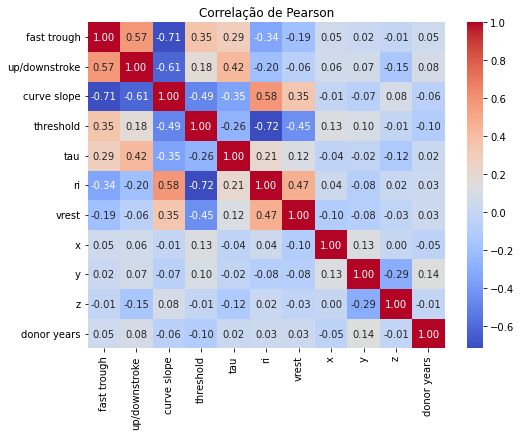

In [12]:
# Verificar se cada coluna contém números float
colunas_float = [coluna for coluna in df_new.columns if df_new[coluna].dtype == float]

# Criar um novo DataFrame com as colunas contendo números float
novo_df = df_new[colunas_float]

# Calcular a correlação de Pearson entre as colunas do novo DataFrame
correlacao = novo_df.corr()

print(correlacao)

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação de Pearson')
#plt.xticks(rotation=80)
ticks, labels = plt.yticks()
plt.yticks(ticks, labels=['fast trough', 'up/downstroke', 'curve slope', 'threshold', 'tau', 'ri', 'vrest', 'x', 'y', 'z', 'donor years'])
ticks, labels = plt.xticks()
plt.xticks(ticks, labels=['fast trough', 'up/downstroke', 'curve slope', 'threshold', 'tau', 'ri', 'vrest', 'x', 'y', 'z', 'donor years'])
plt.savefig('Correlação de Pearson', dpi = 300, bbox_inches='tight')
plt.show()

In [13]:
ef__fast_trough_v_long_square = df_new.iloc[:,10]
ef_upstroke_downstroke_ratio_long_square = df_new.iloc[:,11]
ef__f_i_curve_slope = df_new.iloc[:,12]
ef_threshold_i_long_square = df_new.iloc[:,13]
ef__tau = df_new.iloc[:,14]
ef__ri = df_new.iloc[:,15]
ef__vrest = df_new.iloc[:,16]
csl__x = df_new.iloc[:,17]
csl__y = df_new.iloc[:,18]
csl__z = df_new.iloc[:,19]

In [14]:
# FUNÇÃO

def model(z,t,a,b,c,J):
    X,Y=z
    dx_dt= X-(X**3)-Y+J # c*(X-(1/3)*(X**3)-Y+J)
    dy_dt= c*(X-a*Y+b) # (1/c)*(X+a-b*Y)
    return [dx_dt,dy_dt]

In [15]:
# SIMULAÇÃO

def sim_model(ponto_inicial,J,segundos):
        
    for j in J: 
        fig4, (ax1,ax2)=plt.subplots(1,2, figsize=(20,5))
        fig4.suptitle(f'Modelo de FitzHugh-Nagumo em J={j}', size=40, y=1.1)
        ax1.set_xlabel('X (mV)', size=20)
        ax1.set_ylabel('Y (mV)', size=20)
        ax1.set_title('Plano de fase', size=30)
        ax2.set_xlabel('Tempo (s)', size=20)
        ax2.set_ylabel('X (mV)', size=20)
        ax2.set_title('Potencial de ação', size=30)
        ax2.set_xlim(0,segundos)
        ax1.tick_params(labelsize=20)
        ax2.tick_params(labelsize=20)
                       
        for ini in ponto_inicial:
            sol=odeint(model,ini,t,args=(a,b,c,j))
            sol_X=sol[:,0]
            sol_Y=sol[:,1]
            ax1.plot(sol_X,sol_Y,label=f'In.cond. {ini}')
            ax1.plot(ini[0],ini[1],marker='D', color='black')
            ax2.plot(t,sol_X, ls='dashed', label=f'Condição inicial X={ini[0]}')
        plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig(f'grafico{J}.png', bbox_inches='tight', dpi=300)
    plt.show()

In [16]:
# PARÂMETROS

#a = df_new['ef__threshold_i_long_square'][5]
#b = df_new['ef__tau'][5]
#c = df_new['ef__ri'][5]
#x = df_new['ef__fast_trough_v_long_square'][5]
#y = df_new['ef__vrest'][5]
#J = df_new['ef__upstroke_downstroke_ratio_long_square'][5]

J = [round(df_new['ef__threshold_i_long_square'][2048]/df_new['ef__ri'][2048],2)]
print(J)

a=0.5
b=1
c=0.1
#J=[0]

[0.17]


In [17]:
# TEMPO

T=1000
nt=10000
t=np.linspace(0,T,nt)

In [18]:
# CONDIÇÕES INICIAIS

ponto_inicial=[[0,0],[-1,0.5],[-1.75, -0.75]]

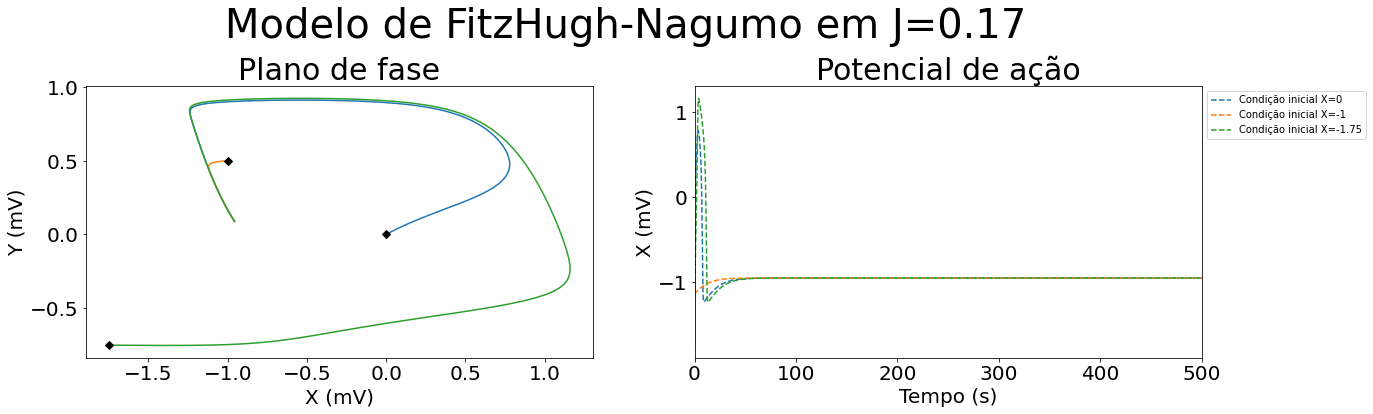

In [19]:
sim_model(ponto_inicial,J,500)

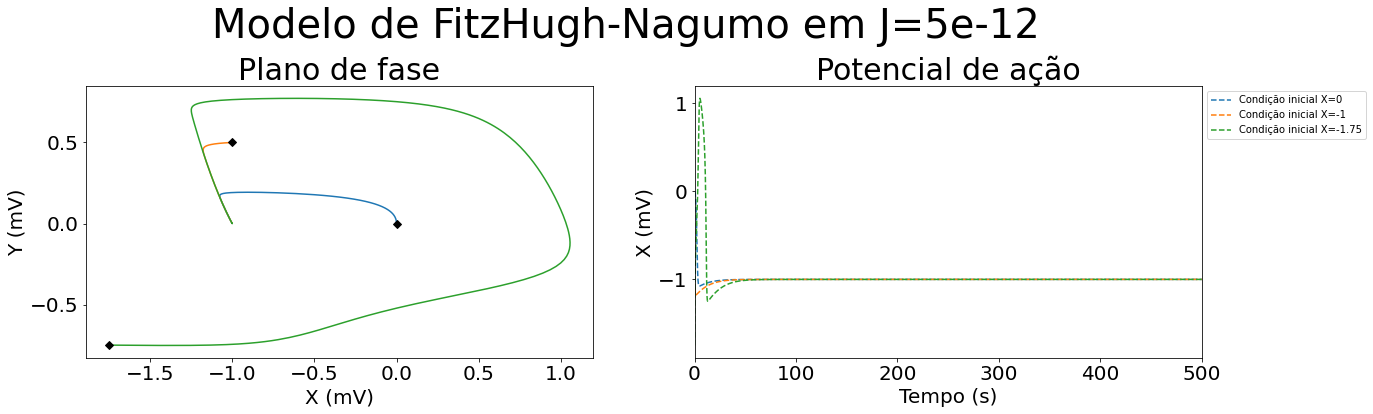

In [20]:
J=[50e-13]
sim_model(ponto_inicial,J,500)

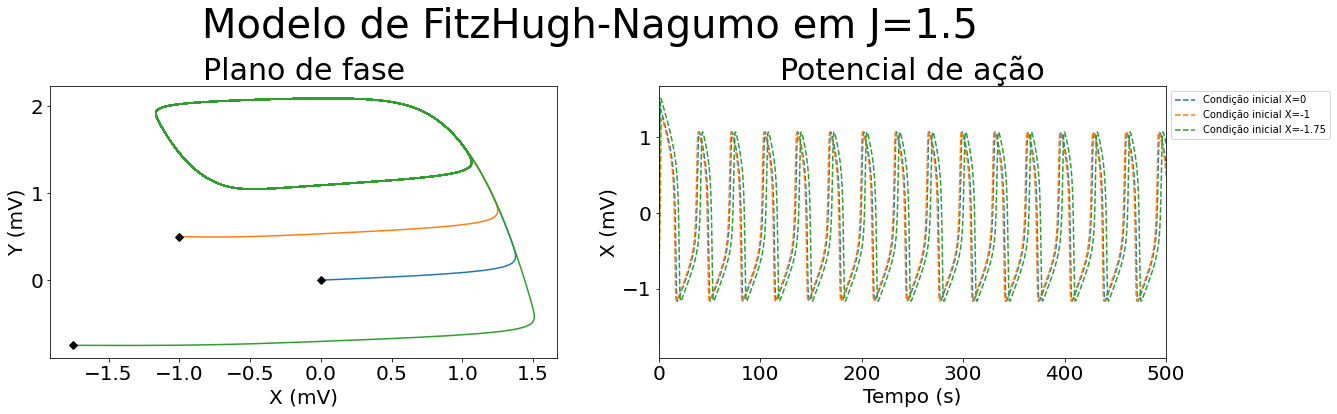

In [21]:
J=[1.5]
sim_model(ponto_inicial,J,500)

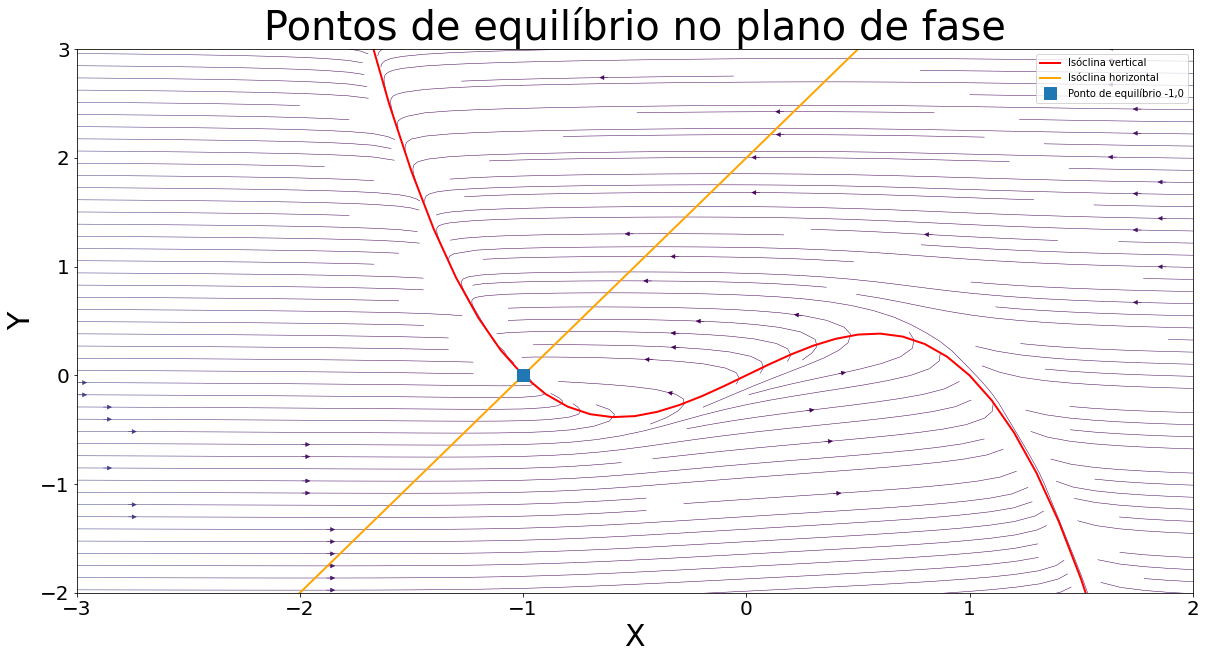

In [22]:
# set the parameters
J=0
a=0.5
b=1
c=0.1

# array for calculating nullclines
V_for_null=np.arange(-10,10,0.1)

# direction field
Y,X=np.mgrid[-5:5:50j,-5:5:50j]
dx_dt=X-X**3-Y+J
dy_dt=c*(X-a*Y+b)
speed=np.sqrt(dx_dt*dx_dt+dy_dt*dy_dt)

# plot the nullclines
fig2, ax=plt.subplots(figsize=(20,10))#linewidth=1
strm=ax.streamplot(X,Y,dx_dt,dy_dt, linewidth=0.5, color=speed,density=3)

plt.plot(V_for_null,V_for_null-V_for_null**3, color='red', label='Isóclina vertical', linewidth=2)
plt.plot(V_for_null,(V_for_null+b)/a,color='orange', label='Isóclina horizontal', linewidth=2)
plt.plot(-1,0,label='Ponto de equilíbrio -1,0', marker='s', markersize=12,linewidth=0)
# plt.plot(sol_V,sol_W, label='oscillations between the left and right branch of the x-nullcline')

plt.title('Pontos de equilíbrio no plano de fase', size=40)

plt.ylim(-2,3)
plt.xlim(-3,2)
ax.set_xlabel('X', size=30)
ax.set_ylabel('Y', size=30)
plt.tick_params(labelsize=20)
plt.legend(loc='upper right')

plt.savefig('pontos de equilíbrio.png')

plt.show()
